## California Housing Prices Prediction

### Introduction

California’s housing market is known for its diversity, and understanding what drives house prices is a classic problem in data science. In this project, we use the California Housing Prices dataset (derived from the 1990 California census) to build a regression model for predicting median house prices in different districts. The dataset includes 10 attributes such as population, median income, and housing characteristics for each district, along with a categorical feature indicating proximity to the ocean, and the target variable is the median house value in USD.

In this notebook, we will walk through an end-to-end machine learning workflow to tackle this problem. The main steps include:

1. **Exploratory Data Analysis (EDA)** – We start by exploring the dataset with summary statistics and visualizations to uncover patterns and relationships (e.g., examining distributions and correlations between features and the target).
2. **Data Preprocessing** – We clean and prepare the data for modeling. This involves handling missing values (for example, the total_bedrooms column has some missing entries that we will need to address), encoding the categorical ocean proximity feature into numerical form, and performing feature scaling or transformations if needed to improve model performance.
3. **Feature Engineering** – We may create additional features or combine existing ones to capture important trends in the data. For instance, constructing new ratios (such as rooms per household or bedrooms per room) can provide more informative signals to enhance the model’s predictive power.
4. **Model Training & Selection** – We will experiment with several machine learning algorithms for regression, starting with a simple Linear Regression as a baseline and then trying more complex models such as Decision Trees, Random Forests, and Gradient Boosting (e.g., XGBoost). Each model is trained on the prepared dataset, and we use techniques like cross-validation to ensure robust performance estimation.
5. **Model Evaluation** – Using a hold-out test set and cross-validation results, we will evaluate the models using metrics like Root Mean Squared Error (RMSE) and Mean Absolute Error (MAE) to compare their accuracy. We’ll also examine the R² score to understand the proportion of variance in house prices that each model can explain. Based on these metrics, we will select the best-performing model for our task.
6. **Insights and Conclusions** – Finally, we interpret the results and discuss which features have the most influence on housing prices. For example, we expect median income to be a strong predictor of house value. We’ll also outline possible improvements or next steps (such as hyperparameter tuning or incorporating additional data) and conclude with key takeaways from the project.

This introduction outlines our plan for analyzing and modeling California housing prices. By following this notebook, you’ll see how we can go from raw data to a reliable predictive model, all while gaining insights into the factors affecting home values in California. **Let's dive in and start exploring the data!**

# 📦 Library Imports and Environment Setup

Before diving into data analysis and modeling, we import the core Python libraries commonly used on Kaggle for data manipulation, numerical operations, and visualization. These packages will form the foundation of our exploratory data analysis (EDA) and modeling pipeline.

In [1]:
# Load essential libraries for data handling and visualization
import pandas as pd        # Data manipulation and analysis (DataFrames)
import numpy as np         # Numerical computations and array operations
import matplotlib.pyplot as plt  # Plotting library for static visualizations
import seaborn as sns      # Statistical data visualization built on Matplotlib


# 📥 Load California Housing Dataset

In this step, we load the California Housing Prices dataset from the Kaggle input directory into a pandas DataFrame. Displaying the first few rows allows us to inspect the data structure and confirm that it has been loaded correctly.

In [2]:
# Load the dataset into a DataFrame
data = pd.read_csv("/kaggle/input/california-housing-prices/housing.csv")

# Preview the first five rows of the dataset to verify structure
data.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


# 📝 Dataset Overview

We use the `info()` method to get a concise summary of the DataFrame, including column names, data types, non-null counts, and memory usage. This helps us identify missing values and ensure each feature is correctly typed before proceeding with analysis and modeling.

In [3]:
# Display DataFrame summary: columns, dtypes, non-null counts, and memory footprint
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


# 🧹 Missing Value Handling

We remove all rows containing null entries to ensure the dataset is clean and prevent issues during model training. This approach simplifies the workflow, though in more advanced projects you might consider imputation or more nuanced strategies.

In [4]:
# Drop rows with any missing values to ensure data quality
data.dropna(inplace=True)

In [5]:
# Verify data integrity and types after dropping nulls
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


# 🎯 Feature and Target Definition

Here, we separate our dataset into input features (`X`) and the target variable (`y`).  
- **Features (`X`)**: All columns except `median_house_value`.  
- **Target (`y`)**: The `median_house_value` column, which we aim to predict.  
This step is essential before splitting the data for training and testing our models.

In [6]:
# Import function to split data into training and testing sets
from sklearn.model_selection import train_test_split

# Define input features (X) by dropping the target column
X = data.drop(['median_house_value'], axis=1)

# Define target vector (y) as the median house value
y = data['median_house_value']

In [7]:
# Preview the feature matrix
X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,INLAND


In [8]:
# Preview the target vector
y

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20433, dtype: float64

# 🚧 Train-Test Split

We split the dataset into training and testing subsets to evaluate model generalization on unseen data. Here, we reserve 20% of the samples for testing and use the remaining 80% for training. This ensures our performance metrics reflect real-world predictive power.

In [9]:
# Split features and target into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y,                 # Input features and target vector
    test_size=0.2,        # 20% of data for testing
    random_state=42       # Ensure reproducibility
)

# 🏋️‍♂️ Combine Features and Target into Training Set

After splitting, we join the training features (`X_train`) and target (`y_train`) back into a single DataFrame called `train_data`. This consolidated dataset is useful for exploratory data analysis and preprocessing steps specific to the training set.

In [10]:
# Combine the training features and target into one DataFrame
train_data = X_train.join(y_train)

# Preview the combined training DataFrame
train_data.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
17727,-121.80,37.32,14.0,4412.0,924.0,2698.0,891.0,4.7027,<1H OCEAN,227600.0
2057,-119.63,36.64,33.0,1036.0,181.0,620.0,174.0,3.4107,INLAND,110400.0
6453,-118.06,34.12,25.0,3891.0,848.0,1848.0,759.0,3.6639,INLAND,248100.0
4619,-118.31,34.07,28.0,2362.0,949.0,2759.0,894.0,2.2364,<1H OCEAN,305600.0
15266,-117.27,33.04,27.0,1839.0,392.0,1302.0,404.0,3.5500,NEAR OCEAN,214600.0


# 📊 Feature Distribution Visualization

Now that we have our training set ready, we switch to visualization. Plotting histograms for each feature helps us understand their distributions, identify skewness, and spot potential outliers before feature engineering or modeling.

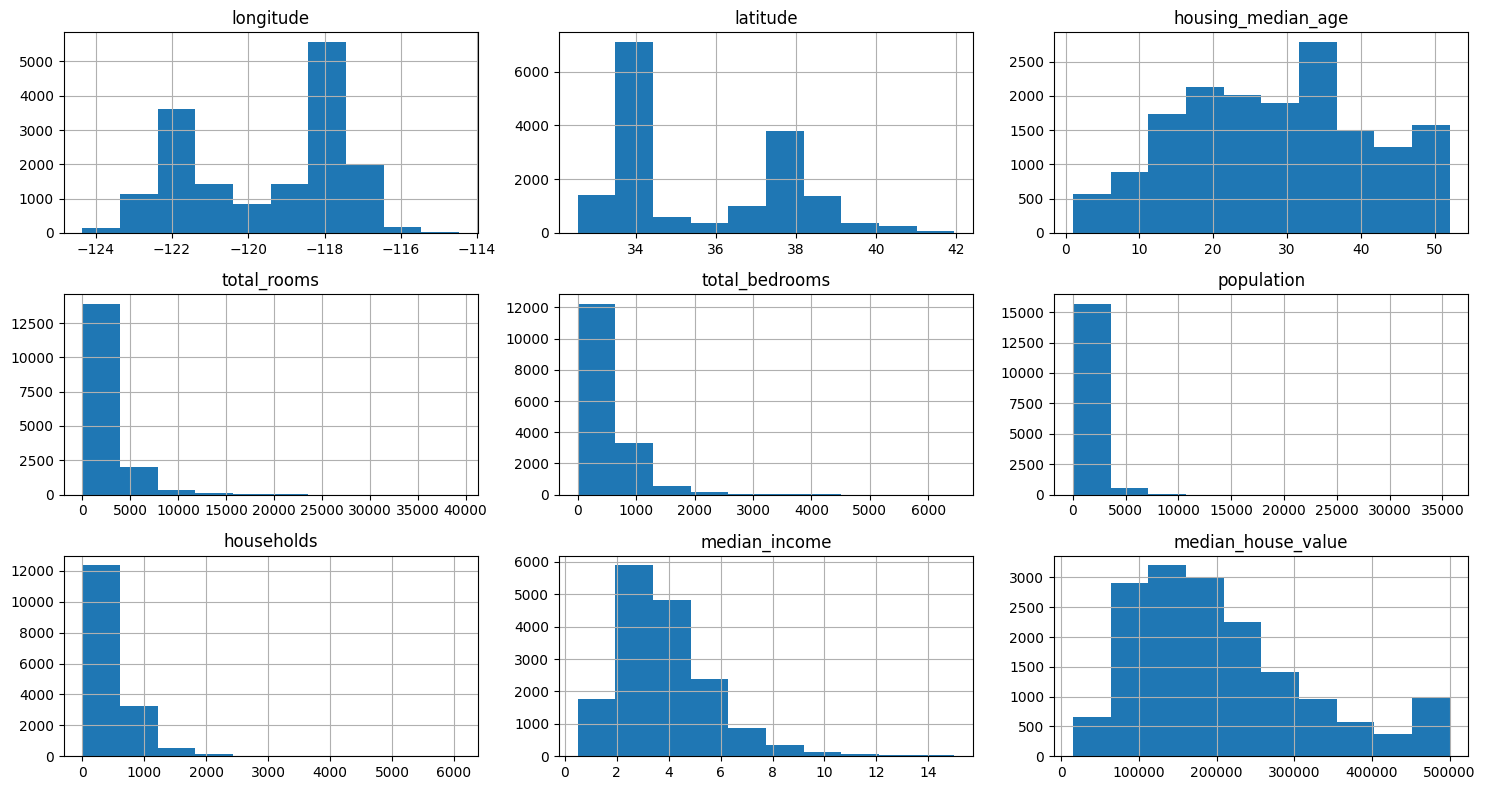

In [11]:
# Plot histograms for all features in the training set to examine distributions
train_data.hist(figsize=(15, 8))
plt.tight_layout()  # Adjust subplot params for better spacing
plt.show()          # Display the histograms

# 📈 Correlation Heatmap

We generate a heatmap of the pairwise correlations between numeric features in the training set. This visualization highlights which variables move together and helps identify multicollinearity or strong predictors before feature engineering and model selection.

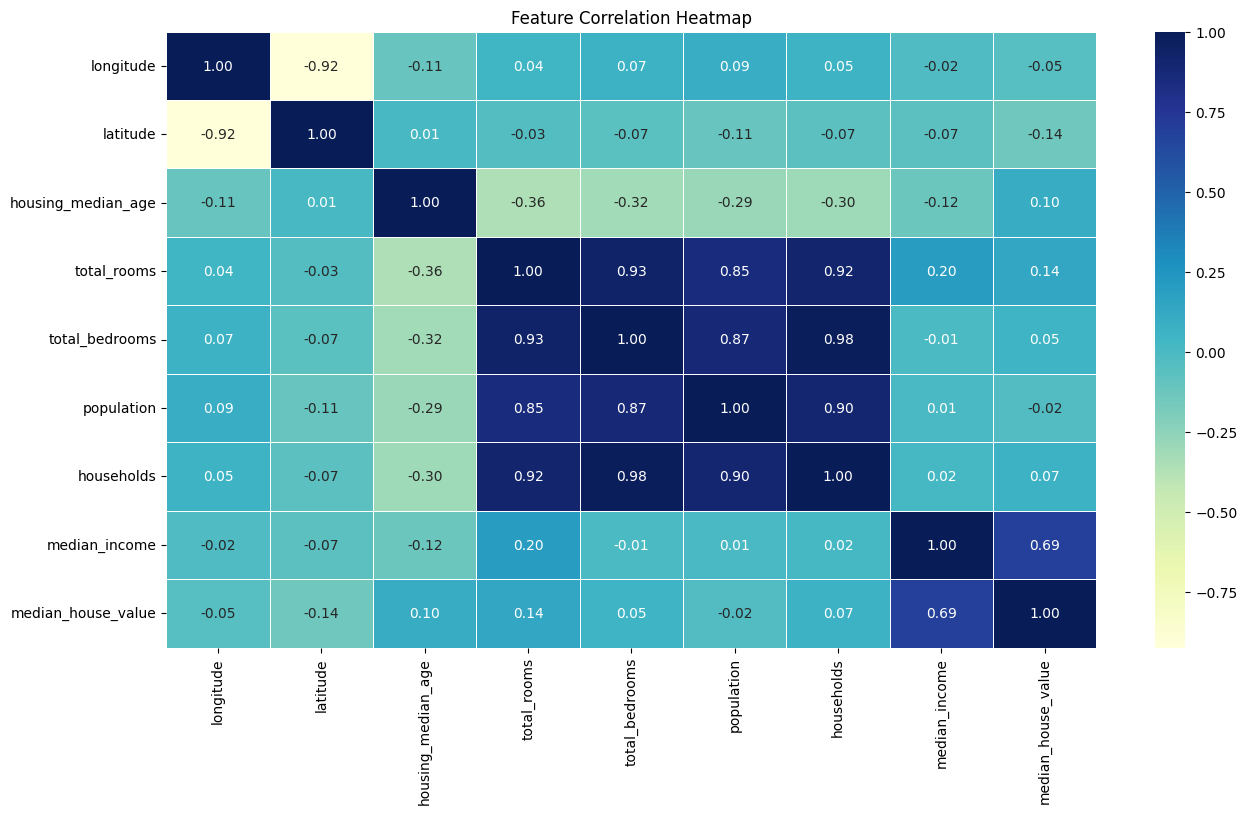

In [12]:
# Set figure size for the heatmap
plt.figure(figsize=(15, 8))

# Compute correlations and plot heatmap with annotations
corr_matrix = train_data.corr(numeric_only=True)
sns.heatmap(
    corr_matrix,    # Correlation matrix of numeric features
    annot=True,     # Show correlation coefficients on the heatmap
    cmap="YlGnBu",  # Color palette for better contrast
    fmt=".2f",      # Format numbers with two decimal places
    linewidths=.5   # Add lines between cells for readability
)

# Display the plot
plt.title("Feature Correlation Heatmap")  # Add a title for context
plt.show()

# 📝 Recheck DataFrame Structure

We run `data.info()` once more to confirm that after preprocessing and visualization steps, our DataFrame still maintains the correct structure—no missing values and proper data types—for all features before moving on to modeling.

In [13]:
# Display concise summary: columns, data types, non-null counts, and memory usage
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


# 🔄 Log Transformation of Skewed Features

We apply a log(1 + x) transformation to skewed numerical features—`total_rooms`, `total_bedrooms`, `population`, and `households`. This reduces the effect of extreme values, making distributions more Gaussian-like and often improving model performance.

In [14]:
# Apply log(1 + x) transformation to handle skewness in numerical features
train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1)      # Rooms per block
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1)  # Bedrooms per block
train_data['population'] = np.log(train_data['population'] + 1)        # Residents per block
train_data['households'] = np.log(train_data['households'] + 1)        # Households per block

# 🔄 Post-Transformation Feature Distribution

After applying log transformations, we re-plot histograms to observe how the distributions of our features have changed. This helps verify that skewness has been reduced and the data is more normally distributed for modeling.

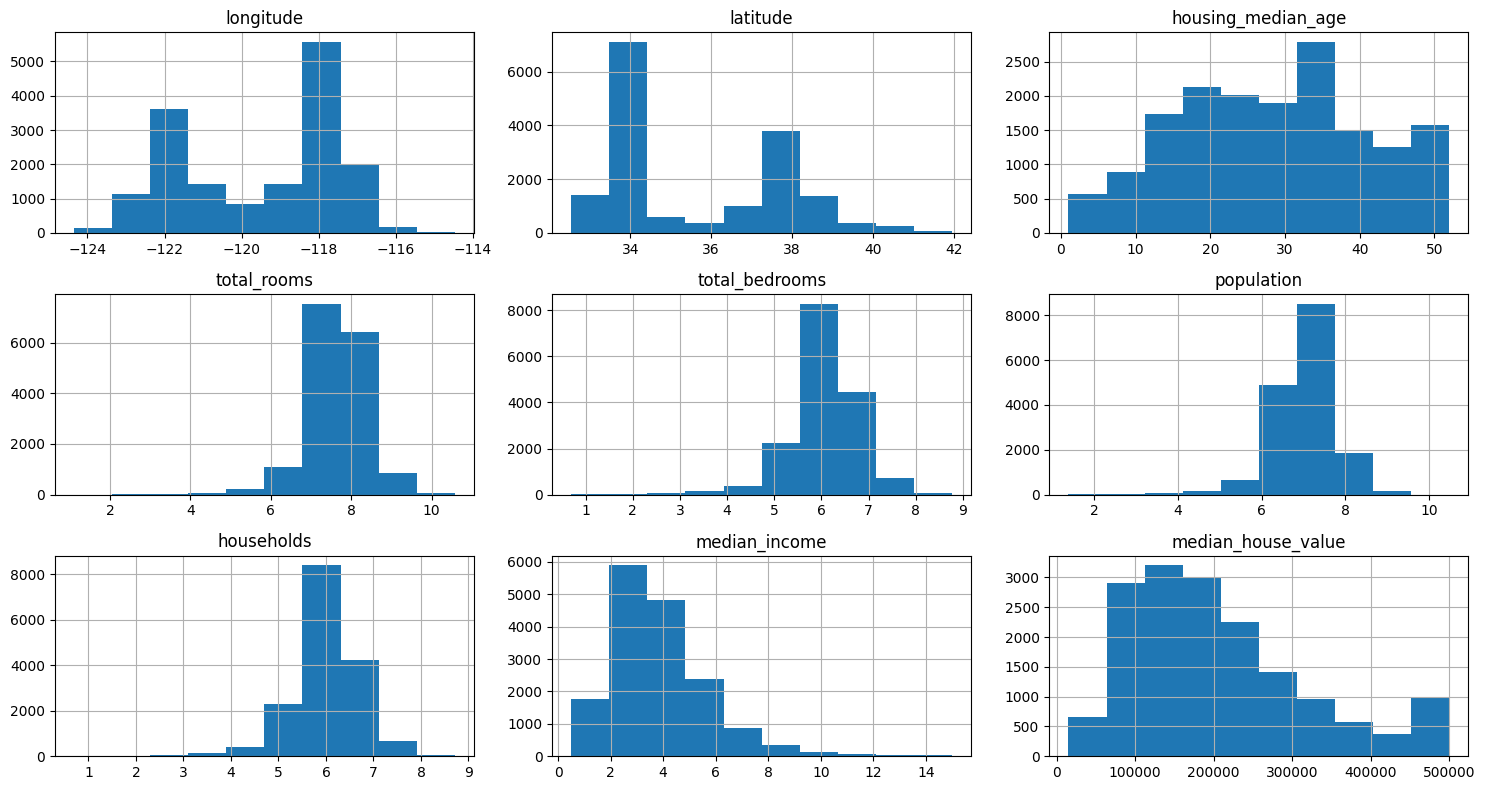

In [15]:
# Plot histograms again to verify distribution changes after log transformation
train_data.hist(figsize=(15, 8))
plt.tight_layout()  # Ensure proper spacing between subplots
plt.show()          # Display the updated histograms

# 🏷️ One-Hot Encoding Categorical Feature

We convert the `ocean_proximity` categorical column into one-hot encoded dummy variables, then remove the original column. This transforms the spatial proximity feature into a set of binary indicators that can be ingested by most machine learning algorithms.

In [16]:
# One-hot encode the 'ocean_proximity' categorical feature
dummies = pd.get_dummies(train_data['ocean_proximity'], prefix='ocean')  
train_data = train_data.join(dummies)  # Merge dummy variables into train_data

# Drop the original 'ocean_proximity' column now that it's encoded
train_data.drop(['ocean_proximity'], axis=1, inplace=True)

In [17]:
# Display the first five rows of the processed training DataFrame
train_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_<1H OCEAN,ocean_INLAND,ocean_ISLAND,ocean_NEAR BAY,ocean_NEAR OCEAN
17727,-121.80,37.32,14.0,8.392310,6.829794,7.900637,6.793466,4.7027,227600.0,True,False,False,False,False
2057,-119.63,36.64,33.0,6.944087,5.204007,6.431331,5.164786,3.4107,110400.0,False,True,False,False,False
6453,-118.06,34.12,25.0,8.266678,6.744059,7.522400,6.633318,3.6639,248100.0,False,True,False,False,False
4619,-118.31,34.07,28.0,7.767687,6.856462,7.922986,6.796824,2.2364,305600.0,True,False,False,False,False
15266,-117.27,33.04,27.0,7.517521,5.973810,7.172425,6.003887,3.5500,214600.0,False,False,False,False,True


# 🔍 Correlation Heatmap After Preprocessing

We visualize the pairwise correlation matrix of the fully processed training data (including log-transformed and one-hot encoded features). This heatmap helps us identify lingering multicollinearity, spot strong feature-target relationships, and guide further feature selection or engineering.

# 🗺️ Geospatial Price Distribution

We create a geospatial scatter plot of the training data, mapping each home’s location by latitude and longitude and coloring points by their median house value. This visualization reveals regional price patterns and potential geographic clusters of high- or low-priced areas.

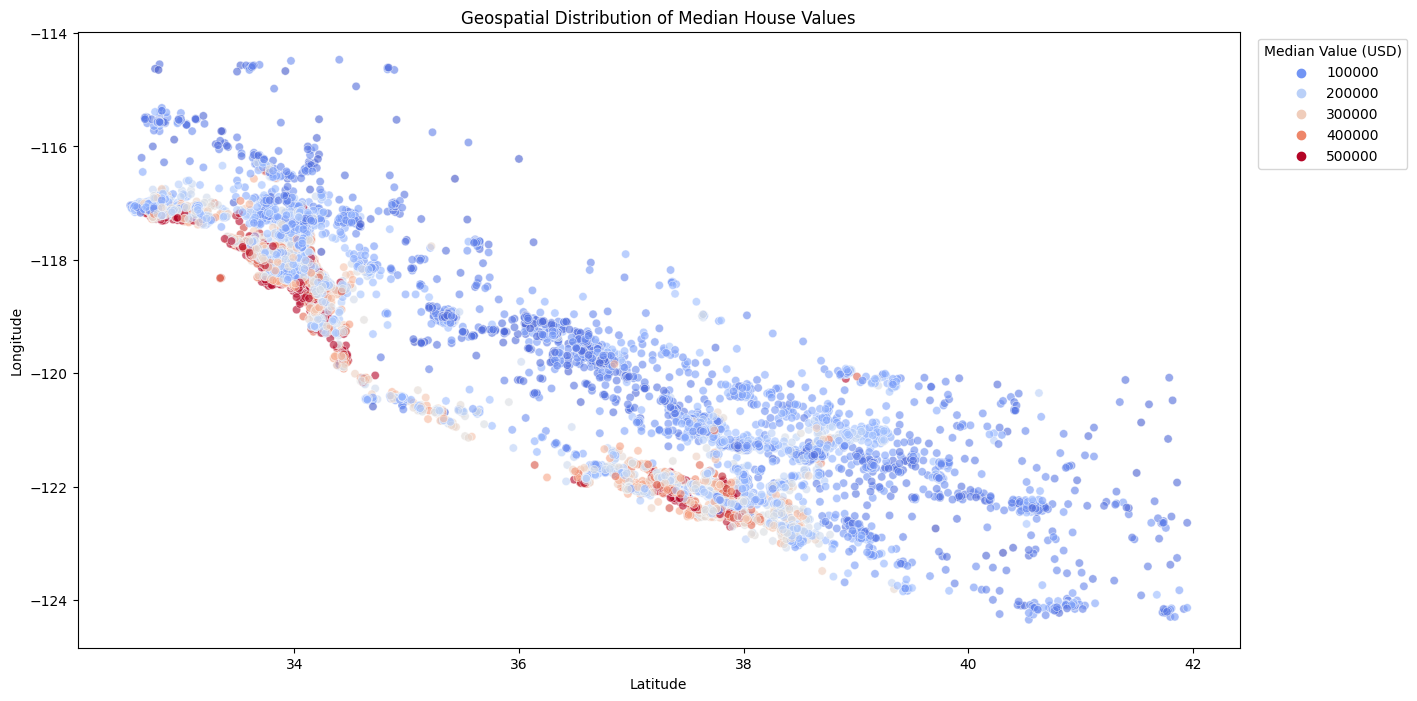

In [18]:
# Set up figure size for better visibility
plt.figure(figsize=(15, 8))

# Plot a scatterplot of geographic coordinates colored by house value
# Enlem (latitude) ve boylam (longitude) koordinatlarına göre nokta grafiği çiz
# Noktaları medyan ev değeri ile renklendir (hue)
sns.scatterplot(
    x="latitude", 
    y="longitude", 
    data=train_data, 
    hue="median_house_value",  # Color by target variable
    palette="coolwarm",        # Use a diverging palette for clear contrast
    alpha=0.6                  # Slight transparency to handle overplotting
)

# Add titles and labels for context
plt.title("Geospatial Distribution of Median House Values")
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.legend(title="Median Value (USD)", loc="upper right", bbox_to_anchor=(1.15, 1))
plt.show()  # Display the plot

# 🔧 New Feature Engineering: Room Ratios

We create two new ratio-based features to capture housing composition:

- **`bedroom_ratio`**: Proportion of bedrooms relative to total rooms, highlighting dwelling layout density.  
- **`household_rooms`**: Average number of rooms per household, reflecting space available per household.

These engineered features often help regression models better differentiate between cramped and spacious districts.

In [19]:
# Create ratio of bedrooms to total rooms to capture layout density
train_data['bedroom_ratio'] = train_data['total_bedrooms'] / train_data['total_rooms']

# Compute rooms per household to reflect average space per household
train_data['household_rooms'] = train_data['total_rooms'] / train_data['households']

# 🔄 Updated Correlation Heatmap with Engineered Features

After adding the `bedroom_ratio` and `household_rooms` features, we re-plot the correlation heatmap. This helps us see how the new ratios relate to existing features and the target, guiding potential feature selection or importance assessment before modeling.

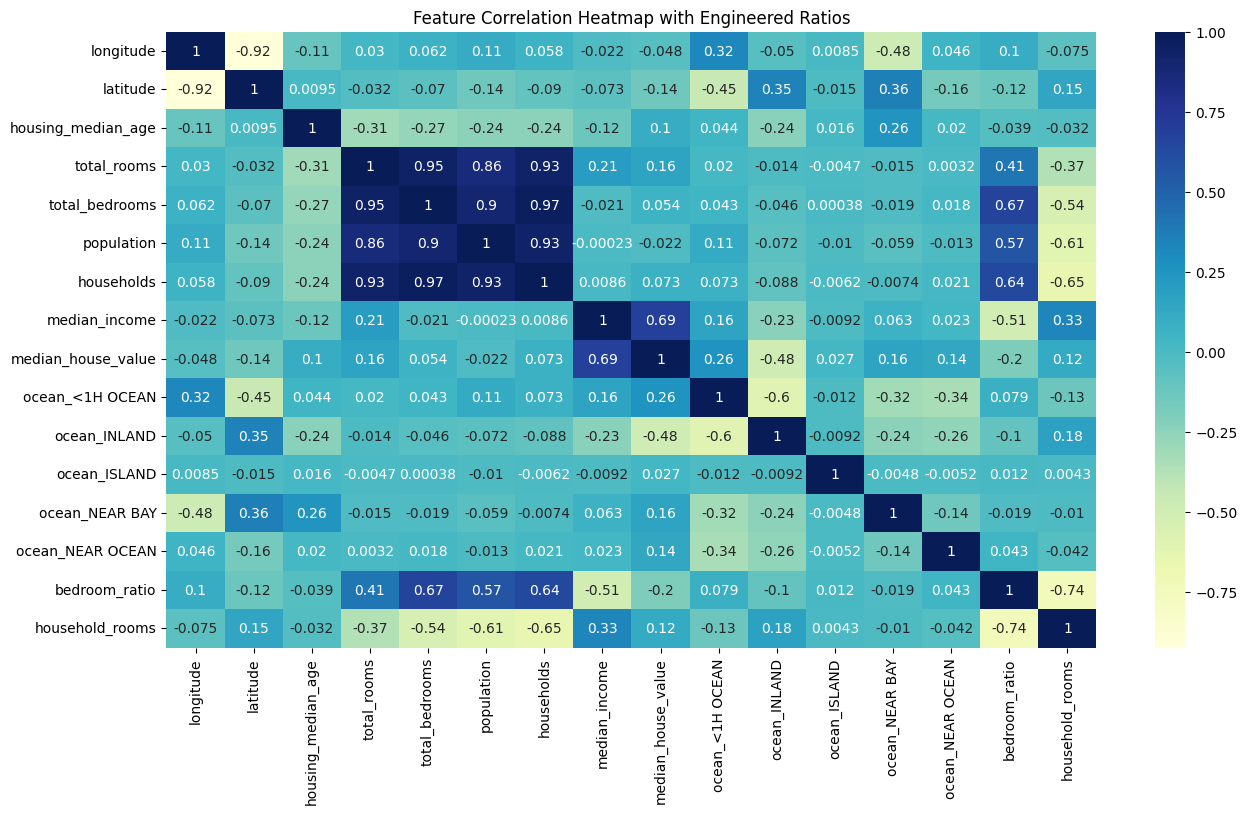

In [20]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")
plt.title("Feature Correlation Heatmap with Engineered Ratios")
plt.show()

# 🔧 Model Initialization, Scaling & Training

In this section, we standardize features and train a baseline Linear Regression model. First, we import `StandardScaler` to normalize feature distributions, then fit-transform the training features. Finally, we initialize and fit a `LinearRegression` estimator on the scaled data to learn the relationship between our engineered features and median house values.

In [21]:
# Import Linear Regression model and StandardScaler for feature normalization
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# Initialize scaler to standardize feature distributions (zero mean, unit variance)
scaler = StandardScaler()

# Separate features (X_train) and target (y_train) from processed training DataFrame
X_train = train_data.drop(['median_house_value'], axis=1)
y_train = train_data['median_house_value']

# Fit scaler on training features and transform to obtain normalized data
X_train_s = scaler.fit_transform(X_train)

# Initialize a Linear Regression estimator as our baseline model
reg = LinearRegression()

# Train the model on the scaled training data
reg.fit(X_train_s, y_train)


LinearRegression()

# 🧪 Prepare Test Set with Consistent Preprocessing

We apply the same sequence of preprocessing steps to the test set to ensure consistency between training and evaluation. This includes merging features and target, log-transforming skewed variables, one-hot encoding the categorical feature, and engineering the same ratio features.

In [22]:
# Combine test features and target into one DataFrame
test_data = X_test.join(y_test)  # Merge X_test and y_test

# Apply log(1 + x) transformation to skewed numerical features
test_data['total_rooms'] = np.log(test_data['total_rooms'] + 1)      # Rooms per block
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'] + 1)  # Bedrooms per block
test_data['population'] = np.log(test_data['population'] + 1)        # Residents per block
test_data['households'] = np.log(test_data['households'] + 1)        # Households per block

# One-hot encode the 'ocean_proximity' categorical feature
dummies_test = pd.get_dummies(test_data['ocean_proximity'], prefix='ocean')  
test_data = test_data.join(dummies_test)  # Merge dummy variables
test_data.drop(['ocean_proximity'], axis=1, inplace=True)  # Drop original column

# Create the same engineered ratio features as in training set
test_data['bedroom_ratio'] = test_data['total_bedrooms'] / test_data['total_rooms']
test_data['household_rooms'] = test_data['total_rooms'] / test_data['households']

# 🎯 Test Features and Target Extraction

We separate the processed test DataFrame into input features (`X_test`) and the target variable (`y_test`). This mirrors the setup of the training data and prepares the datasets for scaling and model evaluation.

In [23]:
# Define test features by dropping the target column
X_test = test_data.drop(['median_house_value'], axis=1)

# Define test target vector
y_test = test_data['median_house_value']

# 🔄 Feature Scaling on Test Set

We apply the trained `StandardScaler` to the test features so that they are normalized with the same parameters used for the training data. This ensures consistency in feature distributions before model evaluation.

In [24]:
# Scale test features using the previously fitted scaler (zero mean, unit variance)
X_test_s = scaler.transform(X_test)

# 📊 Model Performance on Test Set

We evaluate the trained Linear Regression model on the scaled test set using the R² score. This metric indicates how well the model explains the variance in median house values on unseen data—values closer to 1.0 represent better fit.

In [25]:
# Compute and display the R² score on the test set
test_score = reg.score(X_test_s, y_test)
print(f"Test R² Score: {test_score:.4f}")

Test R² Score: 0.6687


# 🌲 Random Forest Model Initialization & Training

To compare with our linear baseline, we now initialize and train a Random Forest Regressor. This ensemble method builds multiple decision trees on bootstrapped samples and averages their predictions, often improving accuracy and handling non-linear relationships.

In [26]:
# Import Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

# Initialize the model with a fixed random_state for reproducibility
forest = RandomForestRegressor(random_state=42)

# Train the Random Forest on the scaled training data
forest.fit(X_train_s, y_train)

RandomForestRegressor(random_state=42)

# 🌟 Random Forest Performance on Test Set

We evaluate the Random Forest Regressor on the scaled test data using the R² score. This gives us a direct comparison to our Linear Regression baseline, revealing how much variance in house prices the ensemble model explains on unseen data.

In [27]:
# Compute and display the R² score for the Random Forest model
rf_test_score = forest.score(X_test_s, y_test)
print(f"Random Forest Test R² Score: {rf_test_score:.4f}")

Random Forest Test R² Score: 0.8194


# 🔍 Hyperparameter Tuning with Grid Search

We use `GridSearchCV` to systematically explore combinations of hyperparameters for our Random Forest model. By evaluating each configuration with 5-fold cross-validation and the negative MSE metric, we identify the parameter set that minimizes prediction error and yields the best generalization.

In [28]:
# Import GridSearchCV for exhaustive hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# Re-initialize the Random Forest Regressor
forest = RandomForestRegressor(random_state=42)

# Define the hyperparameter grid to search
param_grid = {
    "n_estimators": [100, 200, 300],       # Number of trees in the forest
    "min_samples_split": [2, 4],           # Minimum samples required to split an internal node
    "max_depth": [None, 4, 8]              # Maximum depth of each tree
}

# Set up GridSearchCV: 5-fold CV, negative MSE scoring, return training scores
grid_search = GridSearchCV(
    estimator=forest,
    param_grid=param_grid,
    cv=5,                                  # 5-fold cross-validation
    scoring="neg_mean_squared_error",      # Evaluate by negative mean squared error
    return_train_score=True                # Keep train scores for analysis
)

# Perform the grid search on scaled training data
grid_search.fit(X_train_s, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [None, 4, 8], 'min_samples_split': [2, 4],
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, scoring='neg_mean_squared_error')

# 🏆 Select Best Random Forest Model

We retrieve the best-performing Random Forest estimator found by `GridSearchCV`. This model has the optimal hyperparameters that minimize prediction error on cross-validation, ready for final evaluation on the test set.

In [29]:
# Extract the best estimator from the grid search
best_forest = grid_search.best_estimator_

# Display the chosen hyperparameters for transparency
print("Best Random Forest Parameters:")
print(best_forest.get_params())

Best Random Forest Parameters:
{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 4, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 300, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


# ✅ Final Model Evaluation on Test Set

We evaluate the optimized Random Forest (the `best_forest` from grid search) on the scaled test data using the R² score. This final metric shows how well our tuned ensemble model explains variance in unseen median house values.

In [30]:
# Compute and display the R² score for the tuned Random Forest model
best_score = best_forest.score(X_test_s, y_test)
print(f"Best Random Forest Test R² Score: {best_score:.4f}")

Best Random Forest Test R² Score: 0.8222
